In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data

In [39]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Classification/binary_classification_2d_data.xlsx')
data

,Feature1,Feature2,Label
0,3.671814,5.196861,1
1,2.496714,1.861736,0
2,1.536582,1.534270,0
3,4.399361,4.708306,1
4,5.208864,3.040330,1
5,1.765847,1.765863,0
6,6.465649,4.774224,1
7,4.986503,3.942289,1
8,1.530526,2.542560,0
9,4.455617,5.110923,1


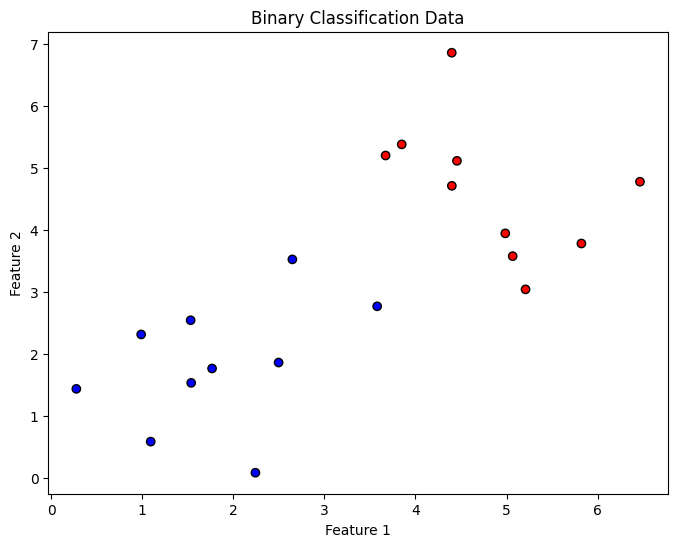

In [40]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Label'], cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data')
plt.show()

In [41]:
X = data.drop('Label', axis=1)

y = data['Label']

# Logistic Regression

## Using sklearn

In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(fit_intercept=True)

# Fit the model to the entire dataset
model.fit(X, y)

# Retrieve the coefficients (weights) and intercept (bias)
weights = model.coef_[0]
bias = model.intercept_[0]

# Output the weights and bias
print(f"Weights: {weights}")
print(f"Bias (Intercept): {bias}")

Weights: [1.26477202 1.03213652]
Bias (Intercept): -8.017543246450748


In [43]:
def plot_decision_boundary(w, bias):
  # Calculate the decision boundary
  x1 = np.linspace(X['Feature1'].min(), X['Feature1'].max(), 100)
  x2 = -(w[0]/w[1]) * x1 - (bias/w[1])

  # Plot the data and decision boundary
  plt.figure(figsize=(8, 6))
  plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap='bwr', edgecolor='k', label='Data points')
  plt.plot(x1, x2, 'k--', label='Decision Boundary')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Logistic Decision Boundary with Bias')
  plt.legend()
  plt.show()

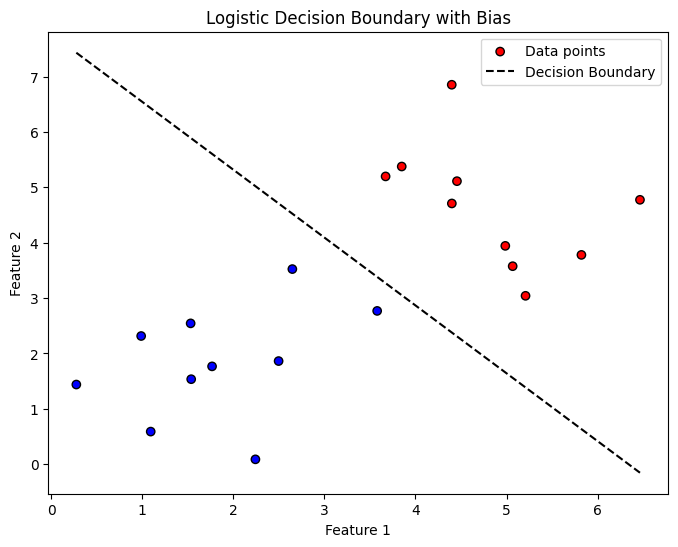

In [44]:
plot_decision_boundary(weights, bias)

## From Scratch

In [45]:
X['Bias'] = 1

In [46]:
def logistic(x) :
  return 1 / (1 + np.exp(-x))

In [47]:
def h(x, w, f):
  return f(np.dot(w.T, x))

In [48]:
w = pd.Series(0, index=X.columns)
alpha = 0.1
gradient = 0.0
for epoch in range(100):
  for i in range(20):
    x = X.iloc[i]
    prediction = h(x, w, logistic)
    w = w + alpha * x * (y[i] - prediction)

w = w + alpha * x * gradient
w

,0
Feature1,1.350232
Feature2,1.067314
Bias,-8.316129


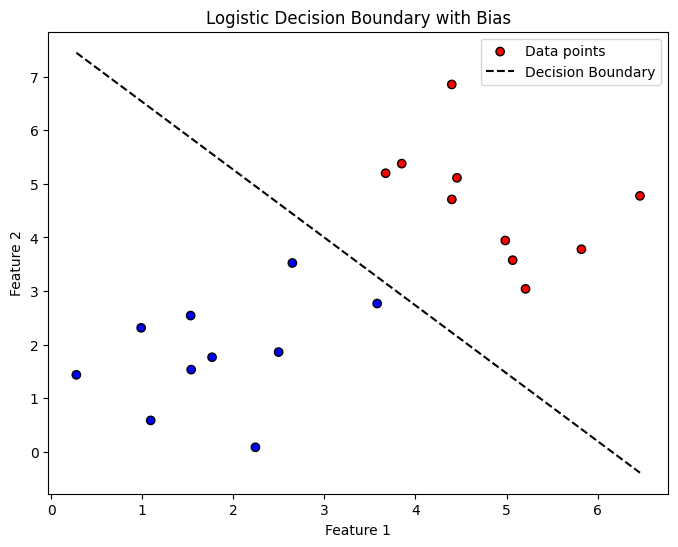

In [49]:
plot_decision_boundary(w, w[-1])